<a href="https://colab.research.google.com/github/vishalgimhan/DeepLearning-learn/blob/main/III_Artificial_Intelligence_Foundations_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import the necessary libraries
import pandas as pd     # For Data Processing
import numpy as np      #For Mathematical Functions

# Keep the graphs in the cell
%matplotlib inline
import matplotlib.pyplot as plt   # For visualizations
import seaborn as sns             # For advanced visualizations

# To Build the Network
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [2]:
# Read the dataset into Pandas DataFrame
url = 'https://raw.githubusercontent.com/vishalgimhan/DeepLearning-learn/refs/heads/main/data/Advertising_2023.csv'
advertising_df = pd.read_csv(url, index_col=0)

In [3]:
advertising_df.head(10)

,digital,TV,radio,newspaper,sales
1,345.15,156.0,37.8,69.2,22.1
2,66.75,46.0,39.3,45.1,10.4
3,25.80,18.3,45.9,69.3,9.3
4,227.25,145.1,41.3,58.5,18.5
5,271.20,165.2,10.8,58.4,12.9
6,13.05,8.7,48.9,75.0,7.2
7,86.25,57.5,32.8,23.5,11.8
8,180.30,120.2,19.6,11.6,13.2
9,12.90,8.6,2.1,1.0,4.8
10,299.70,199.8,2.6,21.2,10.6


In [4]:
# Concise Summary of the dataframe
advertising_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1199 entries, 1 to 1197
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   digital    1199 non-null   float64
 1   TV         1199 non-null   float64
 2   radio      1199 non-null   float64
 3   newspaper  1199 non-null   float64
 4   sales      1199 non-null   float64
dtypes: float64(5)
memory usage: 56.2 KB


In [5]:
# Summary of statistics of data
advertising_df.describe()

,digital,TV,radio,newspaper,sales
count,1199.000000,1199.00000,1199.000000,1199.000000,1199.000000
mean,135.472394,146.61985,23.240617,30.529942,14.005505
std,135.730821,85.61047,14.820827,21.712507,5.202804
min,0.300000,0.70000,0.000000,0.300000,1.600000
25%,24.250000,73.40000,9.950000,12.800000,10.300000
50%,64.650000,149.70000,22.500000,25.600000,12.900000
75%,256.950000,218.50000,36.500000,45.100000,17.400000
max,444.600000,296.40000,49.600000,114.000000,27.000000


In [6]:
# Shape of dataframe - rows and columns
advertising_df.shape

(1199, 5)

In [7]:
# Check null values
advertising_df.isnull().sum()

,0
digital,0
TV,0
radio,0
newspaper,0
sales,0


# Exploratory Data Analysis (EDA)

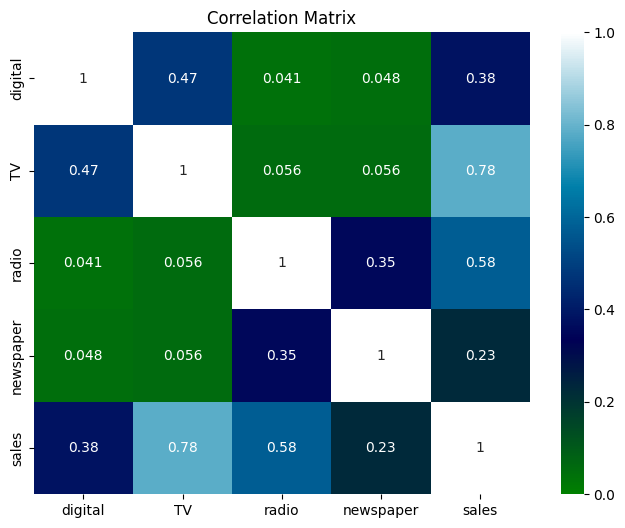

In [8]:
# Correlation among variables
corr = advertising_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, vmin=0, vmax=1, cmap='ocean')
plt.title('Correlation Matrix')
plt.show()

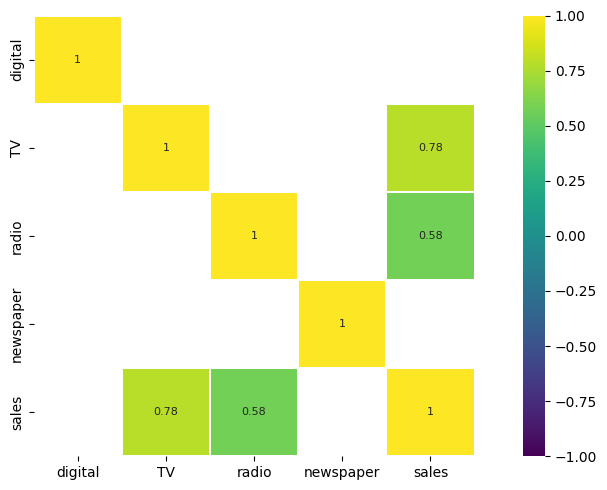

In [9]:
# Heatmap showing top  related variables with Sales
plt.figure(figsize=(10,5))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.7)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidth=0.1,
            annot=True, annot_kws={'size':8}, square=True)
plt.tight_layout()
plt.show()

<Axes: >

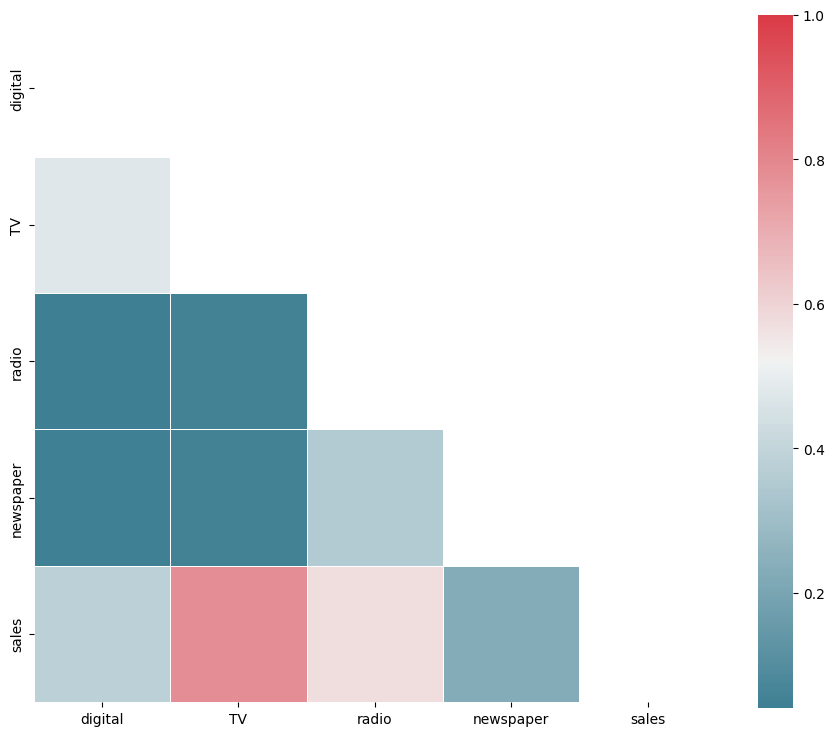

In [10]:
# Heat map with gradient scale on how eachimpact sales

#Generate a mask for the upper triangle
mask = np.zeros_like(advertising_df.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw heatmap with the mask ans correct aspect ratio
sns.heatmap(advertising_df.corr(), mask=mask, cmap=cmap, vmax=1, square=True, linewidth=.5, ax=ax)

In [11]:
# Correlation Matrix
corr

,digital,TV,radio,newspaper,sales
digital,1.000000,0.474256,0.041316,0.048023,0.380101
TV,0.474256,1.000000,0.055697,0.055579,0.781824
radio,0.041316,0.055697,1.000000,0.353096,0.576528
newspaper,0.048023,0.055579,0.353096,1.000000,0.227039
sales,0.380101,0.781824,0.576528,0.227039,1.000000


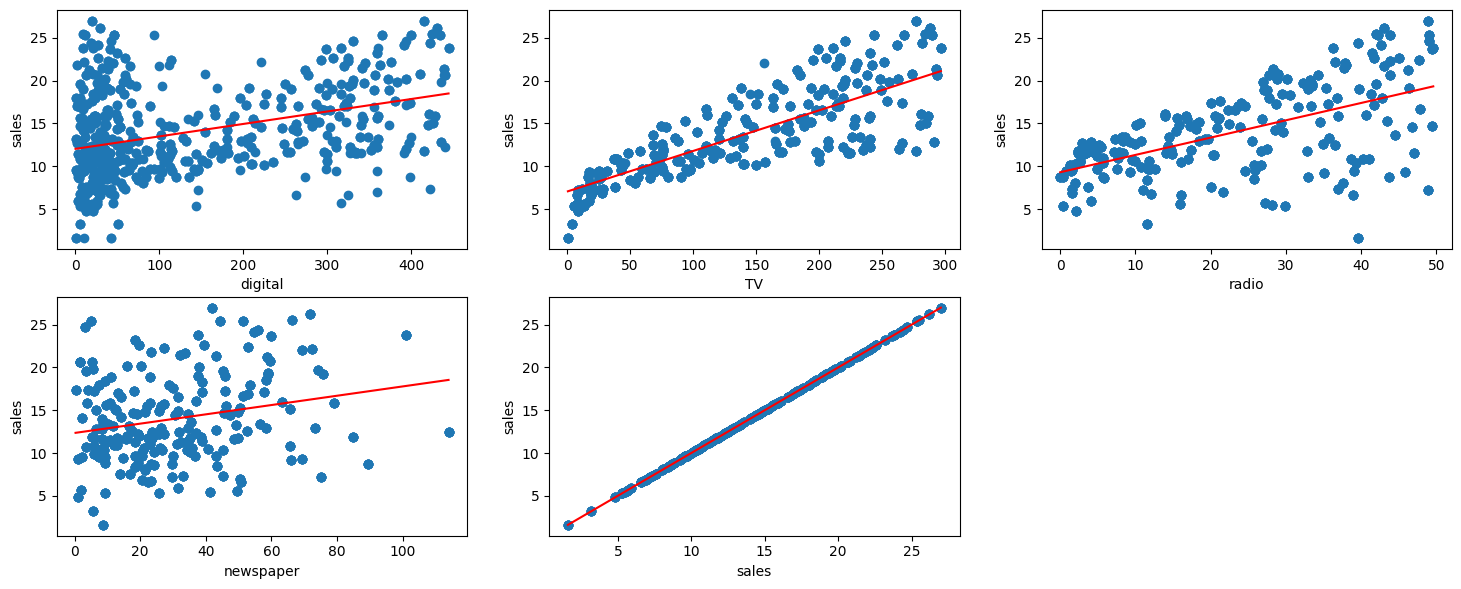

In [12]:
# Scatterplots - each feature vs target

# show the linear relationship between the features and sales. Thus, it privides how scattered they are and which features bas more impact in prediction of house prices

# Visualize all variables with sales
from scipy import stats # For statistical functions

# Create figure
plt.figure(figsize=(18,18))

for i, col in enumerate(advertising_df.columns[0:13]): # iterates all columns except last one (price)
  plt.subplot(5, 3, i+1) # 5 rows & 3 columns, i+1 ensures the position
  x = advertising_df[col] # x-axis
  y = advertising_df['sales'] # y-axis
  plt.plot(x, y, 'o') #'o' - data point as circles

  # Create regression line
  plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1)) (np.unique(x)), color='red')
  # get unique values of x
  # Fit linear regression (degree 1) to the data
  # create a polnomila function from the fit
  # Regression line in red

  plt.xlabel(col) # x-label
  plt.ylabel('sales') # y-label

* TV and Sales relationship is strong and increases in lienar fashion
* Radio and Sales in less strong


# Data Preprocessing

In [13]:
# Split Dataset into X and y
X = advertising_df[['digital', 'TV', 'radio', 'newspaper']]
y = advertising_df['sales']

In [14]:
# Feature Normalization
normalized_feature = keras.utils.normalize(X)
normalized_feature

<tf.Tensor: shape=(1199, 4), dtype=float64, numpy=
array([[0.89211961, 0.4032179 , 0.0977028 , 0.17886333],
       [0.66254734, 0.45658693, 0.39008405, 0.44765371],
       [0.29009225, 0.20576311, 0.51609436, 0.77920128],
       ...,
       [0.06744611, 0.99272247, 0.05163843, 0.08536149],
       [0.19480049, 0.91868871, 0.08898294, 0.33188231],
       [0.06744611, 0.99272247, 0.05163843, 0.08536149]])>

In [15]:
# Split the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [16]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(719, 4) (480, 4) (719,) (480,)


# Build the Model

In [17]:
model = Sequential()
model.add(Dense(4, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1))

# Compile (Configure) Model
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

# Fit the Model
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 32)

Epoch 1/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 374.4017 - mse: 374.4017 - val_loss: 310.3307 - val_mse: 310.3307
Epoch 2/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 297.1805 - mse: 297.1805 - val_loss: 265.6231 - val_mse: 265.6231
Epoch 3/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 254.1978 - mse: 254.1978 - val_loss: 248.7486 - val_mse: 248.7486
Epoch 4/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 239.9481 - mse: 239.9481 - val_loss: 241.1058 - val_mse: 241.1058
Epoch 5/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 229.3505 - mse: 229.3505 - val_loss: 237.0557 - val_mse: 237.0557
Epoch 6/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 210.8615 - mse: 210.8615 - val_loss: 234.0082 - val_mse: 234.0082
Epoch 7/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 224.7495 - mse: 224.7495 - val_loss: 231.9603 - val_mse: 231.9603
Epoch 8/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 214.4480 - mse: 214.4480 - val_loss: 230.1391 - val_mse: 230.1391
Epoch 9

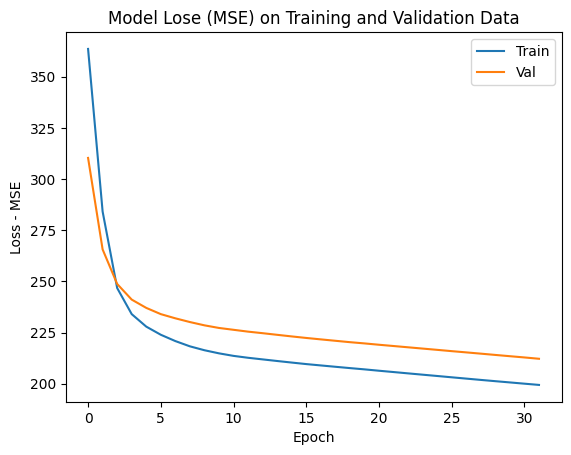

In [18]:
# Viusalizations for Evaluation
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Lose (MSE) on Training and Validation Data')
plt.ylabel('Loss - MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [19]:
# Predict Sales
test_predictions = model.predict(X_test).flatten()
print(test_predictions)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
[ 0.7019183   0.7019183   0.7019183   0.7019183   0.7019183   0.7019183
  0.7019183   0.7019183   0.7019183   0.7019183   0.7019183   0.7019183
  0.7019183   0.69889313  0.7019183   0.7019183   0.7019183   0.7019183
  0.5662093   0.7019183   0.7019183   0.7019183   0.7019183   0.7019183
  0.7019183   0.7019183   0.7019183   0.7019183   0.7019183   0.7019183
  0.7019183   0.7019183   0.7019183   0.7019183   0.64724827  0.7019183
  0.7019183   0.7019183   0.7019183   0.7019183   0.58796114  0.7019183
  0.7019183   0.7019183   0.7019183   0.7019183   0.60507697  0.7019183
  0.7019183   0.7019183   0.6546564   0.7019183   0.7019183   0.7019183
  0.7019183   0.7019183   0.7019183   0.7019183   0.7019183   0.7019183
  0.7019183   0.7019183   0.7019183   0.7019183   0.7019183   0.7019183
  0.7019183   0.7019183   0.7019183   0.7019183   0.7019183   0.7019183
  0.7019183   0.7019183   0.5681846   0.7019183   0.7019183   0.7019183
  0.7019183   0.7019183 

In [20]:
predictions_df = pd.DataFrame(list(zip(y_test, test_predictions)), columns=['True Value', 'Predicted Value'])

# zip - takes two or more iterables (y_test and test_predictions) and aggregates them into tuples
# if y_test is [1, 2, 3] and test_predictions is [1.1, 1.9, 3.2], zip(y_test, test_predictions) will produce [(1, 1.1), (2, 1.9), (3, 3.2)]
# list - converts the zipped object into a list of tuples

# Alternative code achieves the same result using a dictionary to create the DataFrame
#predictions_df = pd.DataFrame({'Actual': y_test, 'Predictions': test_predictions})
predictions_df

,True Value,Predicted Value
0,26.2,0.701918
1,19.0,0.701918
2,12.8,0.701918
3,20.8,0.701918
4,16.9,0.701918
...,...,...
475,13.3,0.701918
476,10.8,0.701918
477,14.7,0.701918
478,3.2,0.701918


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['True Value'].plot(kind='hist', bins=20, title='True Value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Predicted Value'].plot(kind='hist', bins=20, title='Predicted Value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='index', y='True Value', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='True Value', y='Predicted Value', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['True Value']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('True Value')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Predicted Value']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Predicted Value')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_8['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['True Value'].plot(kind='line', figsize=(8, 4), title='True Value')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Predicted Value'].plot(kind='line', figsize=(8, 4), title='Predicted Value')
plt.gca().spines[['top', 'right']].set_visible(False)

In [21]:
# Visualize True and Predicted Values

# Model Evaluation

In [22]:
from sklearn.metrics import mean_squared_error

pred_train = model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train, pred_train)))

pred_test = model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, pred_test)))

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
14.109979627767641
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
14.567021615691733


1.92 vs 1.90

# Hyperparameter Tuning

* Add additional layers
* Add additional neurons
* Change number of epochs

In [31]:
model = Sequential()
model.add(Dense(4, input_dim=4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1))

# Compile (Configure) Model
model.compile(optimizer='Adam', loss='mse', metrics=['mse'])

# Fit the Model
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6048.7256 - mse: 6048.7256 - val_loss: 4943.2495 - val_mse: 4943.2495
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4359.9775 - mse: 4359.9775 - val_loss: 3819.2505 - val_mse: 3819.2505
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3468.9465 - mse: 3468.9465 - val_loss: 3033.9060 - val_mse: 3033.9060
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2720.5806 - mse: 2720.5806 - val_loss: 2481.0364 - val_mse: 2481.0364
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2337.3071 - mse: 2337.3071 - val_loss: 2065.1924 - val_mse: 2065.1924
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1887.3279 - mse: 1887.3279 - val_loss: 1757.5287 - val_mse: 1757.5287
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1607.2063 - mse: 1607.2063 - val_loss: 1514.5297 - val_mse: 1514.5297
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1381.2053 - mse: 1381.2053 - val_loss: 1321.7212 -

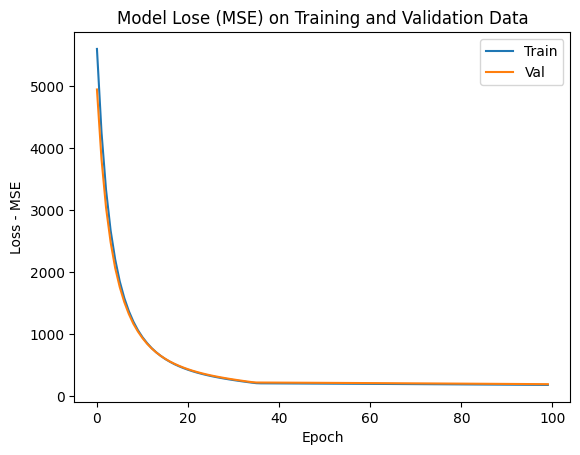

In [32]:
# Viusalizations for Evaluation
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Lose (MSE) on Training and Validation Data')
plt.ylabel('Loss - MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [33]:
# Add learning rate and batch size
model = Sequential()
model.add(Dense(4, input_dim=4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))

# Compile (Configure) Model
opt = keras.optimizers.Adam(learning_rate=.001)
model.compile(optimizer=opt, loss='mse', metrics=['mse'])

# Fit the Model
history = model.fit(X_train, y_train, validation_data = (X_test, y_test),
                    epochs = 32, batch_size=32, verbose=0)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


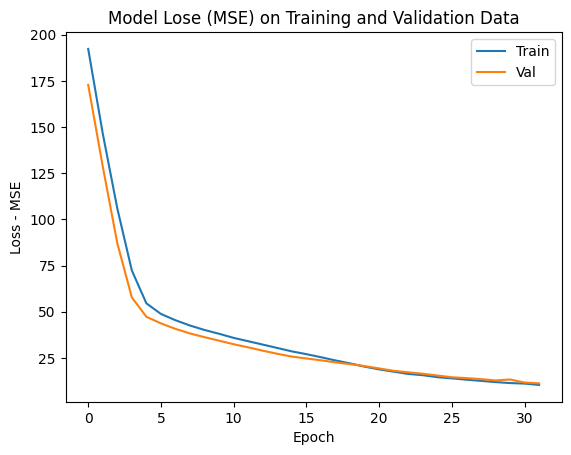

In [34]:
# Viusalizations for Evaluation
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Lose (MSE) on Training and Validation Data')
plt.ylabel('Loss - MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [26]:
# Early stopping added
model = Sequential()
model.add(Dense(4, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1))

# Compile (Configure) Model
model.compile(optimizer='Adam', loss='mse', metrics=['mse'])

# Simple Early Stopping
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

# Fit the Model
history = model.fit(X_train, y_train, validation_data = (X_test, y_test),
                    epochs = 200, batch_size=32, verbose=0, callbacks=[es])

Epoch 52: early stopping


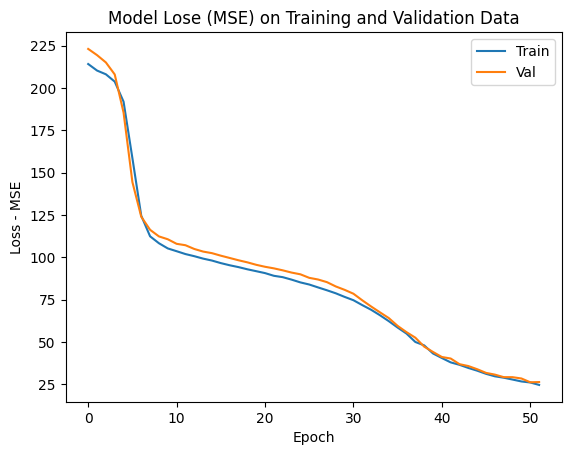

In [27]:
# Viusalizations for Evaluation
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Lose (MSE) on Training and Validation Data')
plt.ylabel('Loss - MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()